# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot(df):
    # diferenciar entre clase 0 y clase 1
    c0 = df[df['output']==0]
    c1 = df[df['output']==1]

    xs0 = [e[0] for e in c0['input']]
    ys0 = [e[1] for e in c0['input']]


    xs1 = [e[0] for e in c1['input']]
    ys1 = [e[1] for e in c1['input']]

    plt.scatter(xs0, ys0, color='limegreen', alpha=0.5)
    plt.scatter(xs1, ys1, color='red', alpha=0.5)
    return plt

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [3]:
def diagonales(n, d, C):
  mean0 = np.full(d,-1)
  mean1 = np.full(d,1)
    
  desviacion_std = C * np.sqrt(d)
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

diagonales(1000, 2, 0.75)

NameError: name 'np' is not defined

Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

<module 'matplotlib.pyplot' from 'c:\\Users\\Ramiro\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

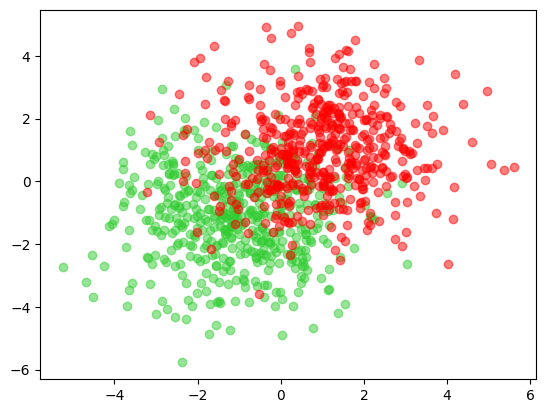

In [30]:
plot(diagonales(1000, 2, 1))

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

<module 'matplotlib.pyplot' from 'c:\\Users\\Ramiro\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

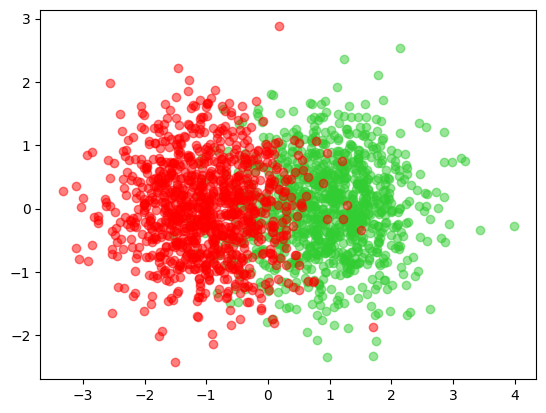

In [31]:
def paralelas(n, d, C):
  mean0 = np.zeros(d)
  mean1 = np.zeros(d)
  mean0[0] = 1
  mean1[0] = -1

  desviacion_std = C
  covarianza = np.diag(np.full(d,desviacion_std)**2)
    
  input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
  input1 = np.random.multivariate_normal(mean1, covarianza, n//2)
    
  output0 = np.full(n//2, 0)  
  output1 = np.full(n//2, 1)
    
  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0, output1]).tolist()
  })

  return df

par_df = paralelas(2000, 2, 0.75)

plot(par_df) 

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

### Determinar lugar de clase 0
Son los $\rho$ que cumplen $0\leq \rho \leq 1$.

Para el $\theta$, se puede obtener que para los extremos:

$\theta = 4\pi\rho \lor \theta=4\pi\rho-\pi$
 
Por lo que se puede hacer variar un valor $a$ entre $[0,1]$ para obtener que

$\theta = 4\pi\rho-a\pi$

<module 'matplotlib.pyplot' from '/home/don-berge/Documentos/IIA-TPS/TP3/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

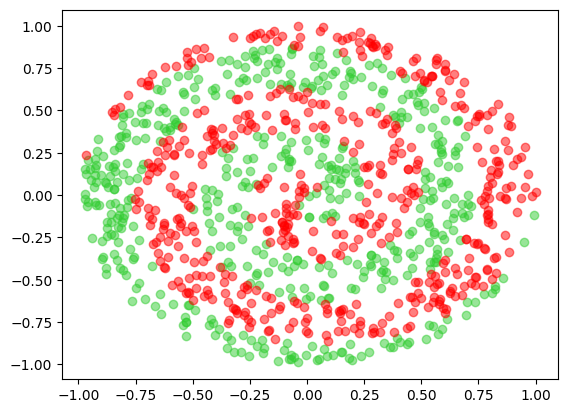

In [5]:
# Primero determino el lugar geometrico de los puntos de clase 0
# 0 <= r0 <= 1
# r0 = theta/4pi => theta = 4pi*r0
# r0 = (theta+pi)/4pi => theta = 4*pi*r0 - pi

# 4*pi*r0 - pi <= theta <= 4*pi*r0
# -pi <= theta-4*pi*r0 <= 0


# Para el caso de r1
# 0 <= r1 <= 1
# theta <= 4*pi*r1 - pi o 4*pi*r1 <= theta

# Para la primera sección
# theta <= pi*(4*r1-1)


# Para la segunda sección
# 4*pi*r1 <= theta 

#### PASO A COORDENADAS CARTESIANAS ####
# r0
# theta = 4*pi*r0 - a*pi
# r0 = (theta + a*pi)/4pi
# x = (theta + a*pi)/4pi * cos(theta)
 
def toCartesianP(r, theta):
  x = r * np.cos(theta)
  y = r * np.sin(theta)
  return (x, y)

def toCartesianA(rs, thetas):
  a = [(r * np.cos(theta), r * np.sin(theta)) for r, theta in zip(rs, thetas)]
  return a

def espirales(n):
  r0s = np.sqrt(np.random.uniform(0, 1, n//2))  
  a0s = np.random.uniform(0, 1, n//2)
  theta0s = [np.pi*(4*r-a) for r,a in zip(r0s,a0s)]

  r1s = np.sqrt(np.random.uniform(0, 1, n//2))
  a1s = np.random.uniform(-1, 0, n//2)
  theta1s = [np.pi*(4*r-a) for r,a in zip(r1s,a1s)]

  input0 = toCartesianA(r0s,theta0s)
  input1 = toCartesianA(r1s,theta1s)

  output0 = np.full(n//2, 0)
  output1 = np.full(n//2, 1)

  df = pd.DataFrame({
      'input': np.concatenate([input0,input1]).tolist(), 
      'output': np.concatenate([output0,output1]).tolist()
  })

  return df

plot(espirales(1000))


# Inicio del TP

En el TP vamos a clasificar los datos usando un arbol de decision con los siguientes parametros:


In [14]:
from sklearn.tree import DecisionTreeClassifier

Tree = lambda: DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

**criterion**: Decide que estrategia usar para decidir en que parametros hacer un split.
El valor "entropy" utiliza el critrio de entropía y ganancia de información visto en clase.

**min_impurity_decrease**: Este valor controla si un split se realizara o no. Se realizara un nodo
en un split si la reduccion de la entropia despues de este split es mayor a este valor. Un arbol
con un *min_impurity_decrease* bajo tendera a realizar mas splits que uno con un valor alto.

**random_state**: Este valor es la semilla para el generador de numeros aleatorios y determina como se
comportara el arbol cuando se sigue un procedimiento que dependa de la aleatoriedad(como por ejemplo mezclar
una lista). Un valor fijo de 0 indica que el arbol realizara el mismo procedimiento en multiples llamadas lo
que aumenta la reproducibilidad.

**min_samples_leaf**: Controla cuantos valores tiene que haber en cada hoja del arbol luego de un split. Un valor
de 5 indica que un nodo sera candidato a un split si y solo si luego de realizarlo hay al menos 5 nodos tanto a la
izquierda como a la derecha del split.

## Ejercicio 1

Generamos 3 conjuntos de entrenamiento para nuestro arbol, correspondientes al
problema de las espirales, de diferentes longitudes; 150, 600 y 3000. 

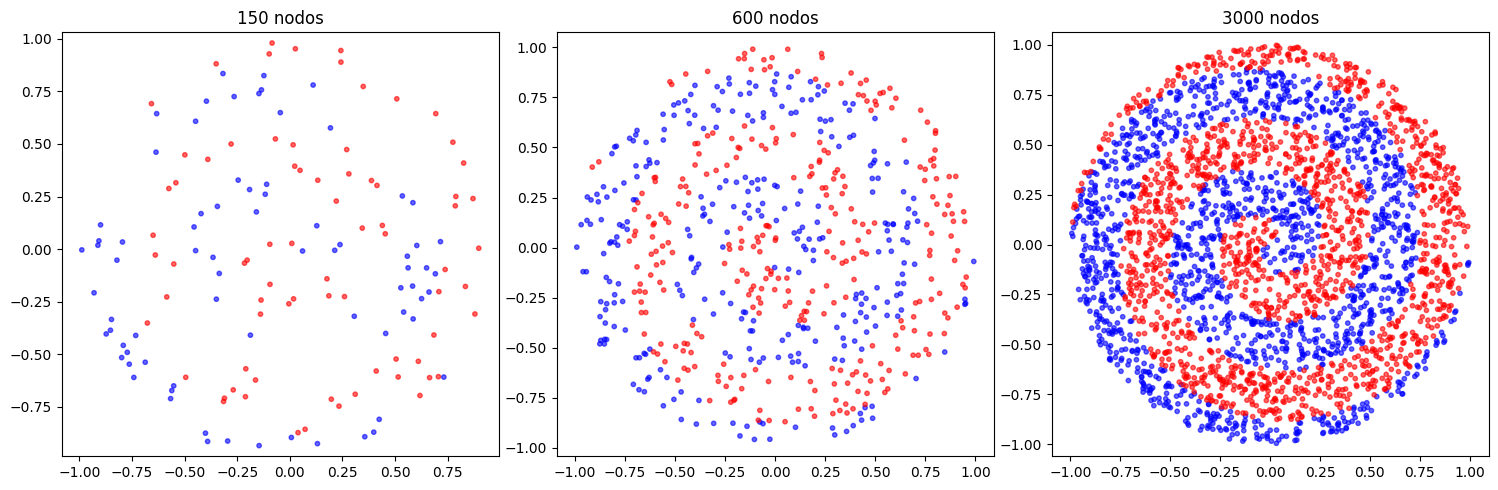

In [74]:
e1 = espirales(150)
e2 = espirales(600)
e3 = espirales(3000)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, data, title in zip(
    axs, [e1, e2, e3], ['150 nodos', '600 nodos', '3000 nodos']):

    x = [p[0] for p in data['input']]
    y = [p[1] for p in data['input']]
    c = data['output']

    ax.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
    ax.set_title(title)
    
    ax.axis('equal')
    ax.axis('on')

plt.tight_layout()
plt.show()

Y un conjunto de prueba usando 10000 puntos de las espirales:

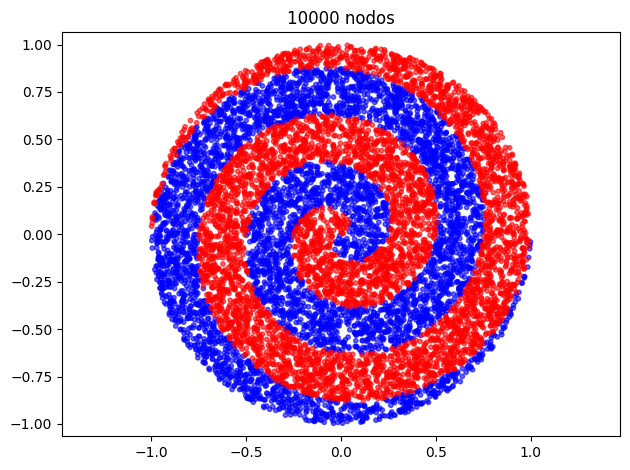

In [75]:
test = espirales(10000)

x = [p[0] for p in test['input']]
y = [p[1] for p in test['input']]
c = test['output']

plt.scatter(x, y, c=c, cmap='bwr', alpha=0.6, s=10)
plt.title("10000 nodos")

plt.axis('equal')
plt.axis('on')

plt.tight_layout()
plt.show()

Entrenamos el arbol de decision a partir de cada uno de los conjunto definidos previamente. Lo cual nos genera los siguientes arboles de ejemplo.

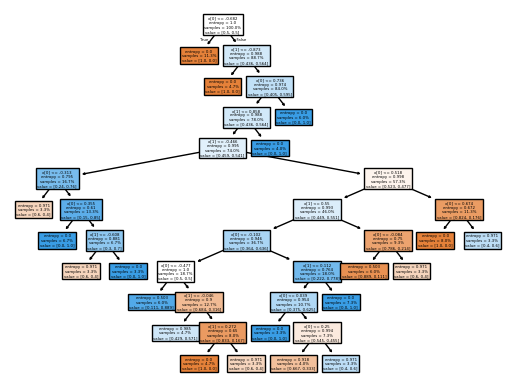

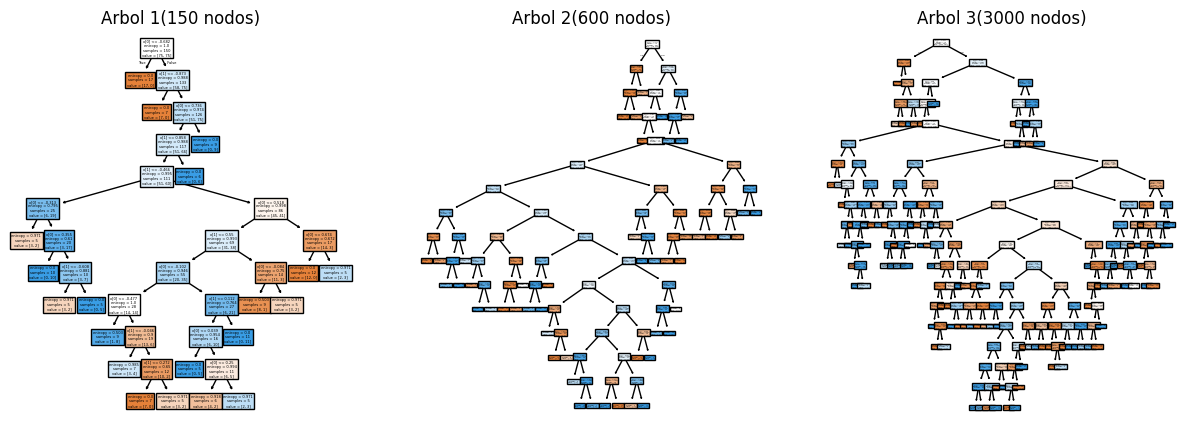

In [ ]:
from sklearn import tree

t1 = Tree()
t2 = Tree()
t3 = Tree()

t1.fit(e1['input'].tolist(), e1['output'].tolist())
t2.fit(e2['input'].tolist(), e2['output'].tolist())
t3.fit(e3['input'].tolist(), e3['output'].tolist())


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, t, title in zip(
    axs, [t1, t2, t3], ['Arbol 1(150 nodos)', 'Arbol 2(600 nodos)', 'Arbol 3(3000 nodos)']):

    tree.plot_tree(t, filled=True, ax=ax)

    ax.set_title(title)
    
    #ax.axis('equal')
    #ax.axis('on')

plt.show()

A medida que aumentan los puntos generados aumenta la cantidad de nodos del arbol. Esto se debe a dos razones, nuestro arbol de decision tiene un *min_impurity_decrease* muy bajo(0.02) esto hace que tienda a hacer muchos splits. Además el valor de *min_sample_leaf* hace que eventualmente el arbol deje de hacer splits para mantener la cantidad de valores en las hojas alto, lo que efectivamente reduce la altura de los arboles y hace que termine antes cuando hay menos nodos.  

Podemos ver que tan bien predicen los arboles si probamos que tan bien predicen los datos del conjunto de test.

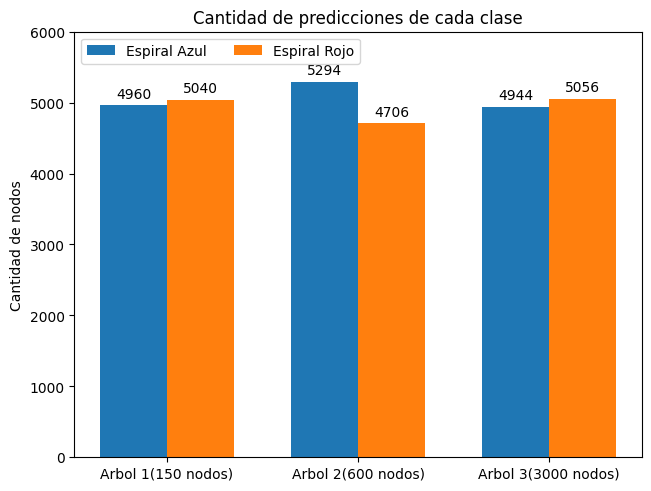

In [68]:
x = [150, 600, 3000]
espiralAzul = []
espiralRojo = []

for t in [t1, t2, t3]:
    # Predigo la clase de cada punto
    pred = t.predict(test['input'].tolist())
    
    azul = pred.tolist().count(0)
    rojo = pred.tolist().count(1)
    
    espiralAzul.append(azul)
    espiralRojo.append(rojo)

data = {
    "Arbol 1(150 nodos)": (espiralAzul[0], espiralRojo[0]),
    "Arbol 2(600 nodos)": (espiralAzul[1], espiralRojo[1]),
    "Arbol 3(3000 nodos)": (espiralAzul[2], espiralRojo[2]),
}

x = np.arange(len(data))

width = 0.35  # Adjusted width for better spacing
fig, ax = plt.subplots(layout='constrained')

# Separate azul and rojo values
azul_values = [v[0] for v in data.values()]
rojo_values = [v[1] for v in data.values()]

# Plot bars for azul and rojo
rects1 = ax.bar(x - width / 2, azul_values, width, label='Espiral Azul')
rects2 = ax.bar(x + width / 2, rojo_values, width, label='Espiral Rojo')

# Add labels
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# Set labels and title
ax.set_ylabel('Cantidad de nodos')
ax.set_title('Cantidad de predicciones de cada clase')
ax.set_xticks(x, list(data.keys()))
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 6000)  # Adjusted y-axis limit for better visualization

plt.show()

La cantidad de elementos predichos para cada clase tiende a ser la misma 5000(PORQUE???????)

<function __main__.plot(df)>

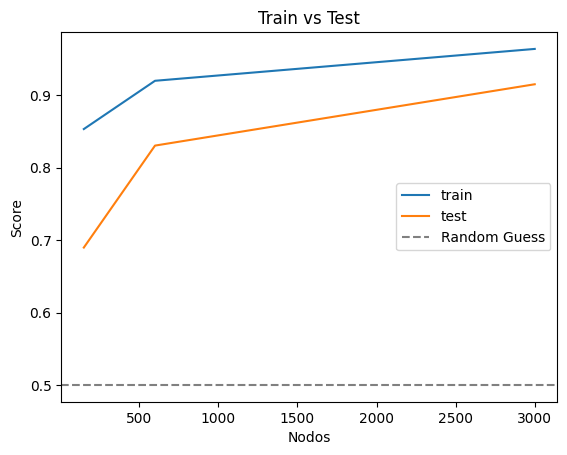

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import time

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)

testSample = espirales(10000)

X_test = testSample['input'].tolist()
Y_test = testSample['output'].tolist()

# Entrenamos


def clfTrain(nnodes):
    e = espirales(nnodes)

    X_train = e['input'].tolist()
    Y_train = e['output'].tolist()
    
    clf.fit(X_train, Y_train)

    return [clf.score(X_train, Y_train), clf.score(X_test, Y_test)]

def trainWith(nnodes, trainFun=clfTrain):
    TRAININGS = 1

    train_scores = []
    test_scores = []

    for _ in range(TRAININGS):
        trainScore, testScore = trainFun(nnodes)
        train_scores.append(trainScore)
        test_scores.append(testScore)
        time.sleep(0.1) # Ayuda a generar los datos aleatorios cambiando la 
                        # semilla

    # Devuelvo el promedio de las puntuaciones
    return np.mean(train_scores), np.mean(test_scores)

def plotTrainTest():
    Xs = [150,600,3000]
    trainValues = [trainWith(x) for x in Xs]

    df = pd.DataFrame(trainValues, columns=['train', 'test'])

    plt.plot(Xs, df['train'], label='train')
    plt.plot(Xs, df['test'], label='test')
    
    plt.axhline(y=0.5, color='gray', linestyle='--', label='Random Guess')

    plt.title('Train vs Test')
    plt.xlabel('Nodos')
    plt.ylabel('Score')
    plt.legend()

    return plot

# ----
from sklearn.metrics import RocCurveDisplay


def rocPlot():
    xs = [150, 600, 3000]
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for x in xs:
        e = espirales(x)
        X_train = e['input'].tolist()
        Y_train = e['output'].tolist()

        clf.fit(X_train, Y_train)

        RocCurveDisplay.from_estimator(clf, X_test, Y_test,label="{} nodos".format(x), ax=ax, alpha=0.5)

    # Graficar la diagonal
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
plotTrainTest()

# rocPlot()


En base a los resultados obtenidos se puede observar que al aumentar la cantidad de nodos el score aumenta (es decir el accuracy). Esto ocurre tanto para los casos de prueba como los de entrenamiento. 

Pero con la diferencia que el aumento es mayor para el entrenamiento que para los de prueba. Este se puede deber ....

# Ejercicio 2

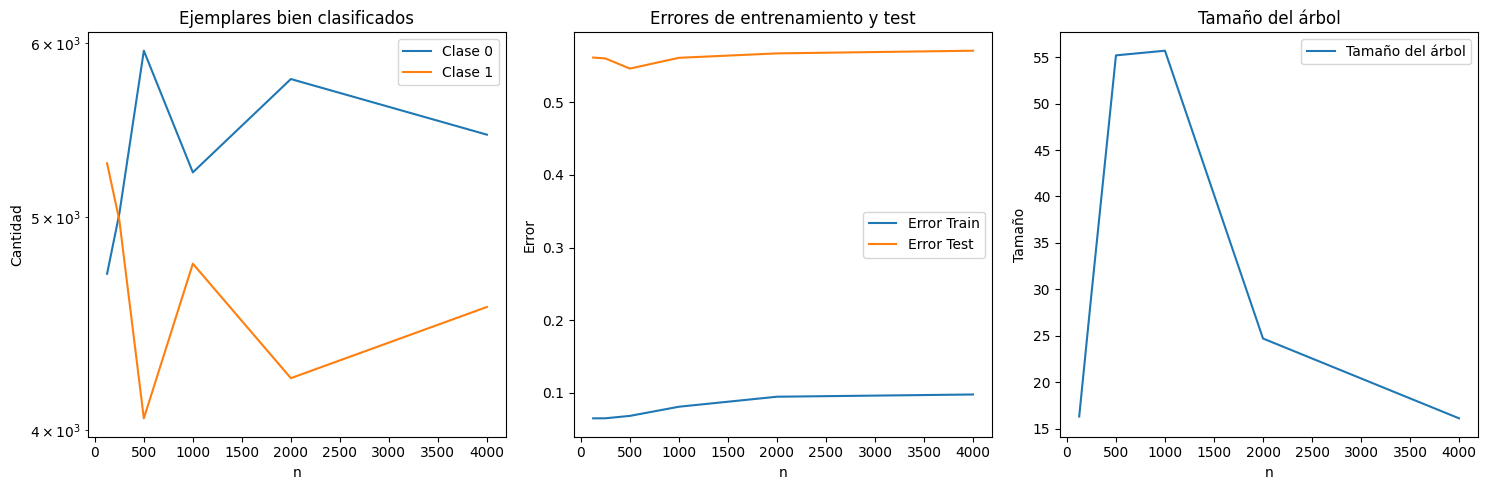

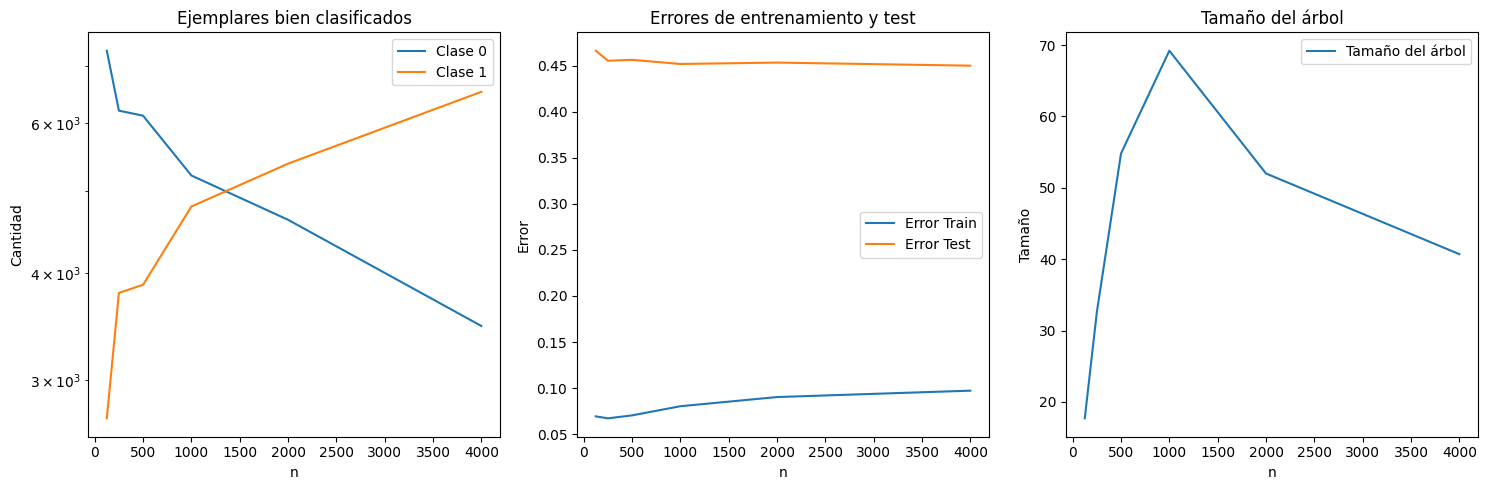

In [35]:
#from matplotlib import plt
TRAIN_SETS = 20
ns = [125, 250, 500, 1000, 2000, 4000]

def fun(gen):
    errors = []
    error_tests = []
    tree_size = []
    acertados = []
    otros = []

    for n in ns:
        error = []
        error_test = []
        sz = 0

        for i in range(TRAIN_SETS):
            e = gen(n, 2, 0.78)
            X_train = e['input'].tolist()
            Y_train = e['output'].tolist()

            clf.fit(X_train, Y_train)

            if(i == TRAIN_SETS-1):
                clase0 = len([c for c in clf.predict(X_test) if c == 0])
                acertados.append(clase0)
                otros.append(len(X_test) - clase0)
            
            scr = clf.score(X_train, Y_train)

            error.append(1-scr)
            error_test.append(1-clf.score(X_test, Y_test))
            sz += clf.tree_.node_count
            
        errors.append(np.mean(error))
        error_tests.append(np.mean(error_test))
        tree_size.append(sz/TRAIN_SETS)


    _, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].semilogy(ns, acertados, label='Clase 0')
    axs[0].semilogy(ns, otros, label='Clase 1')
    axs[0].legend()
    axs[0].set_title('Ejemplares bien clasificados')
    axs[0].set_xlabel('n')
    axs[0].set_ylabel('Cantidad')

    axs[1].plot(ns, errors, label='Error Train')
    axs[1].plot(ns, error_tests, label='Error Test')
    axs[1].legend()
    axs[1].set_title('Errores de entrenamiento y test')
    axs[1].set_xlabel('n')
    axs[1].set_ylabel('Error')

    axs[2].plot(ns, tree_size, label='Tamaño del árbol')
    axs[2].legend()
    axs[2].set_title('Tamaño del árbol')
    axs[2].set_xlabel('n')
    axs[2].set_ylabel('Tamaño')

    plt.tight_layout()
    plt.show()

fun(paralelas)
fun(diagonales)



En base a los resultado obtenidos se ...

# Ejercicio 3

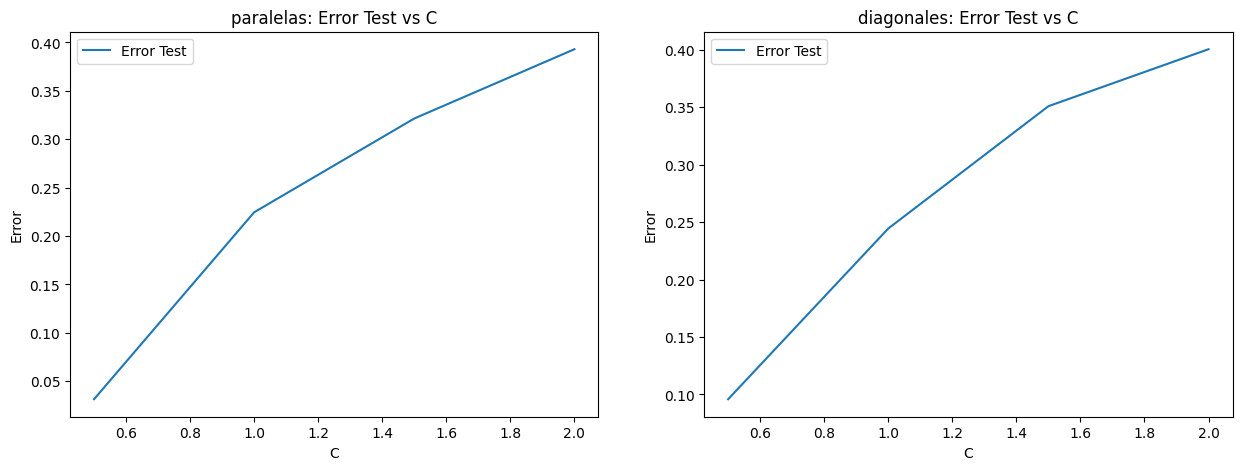

In [36]:
d = 5
n = 250

Cs = [i/2 for i in range(1, 5, 1)]

def ruido():
    j = 0
    _, axs = plt.subplots(1, 2, figsize=(15, 5))
    for gen in [paralelas, diagonales]:
        test_error = []

        for c in Cs:
            test = gen(10000, d, c)

            X_test = test['input'].tolist()
            Y_test = test['output'].tolist()

            error = []
            TRAIN_SETS = 20

            for i in range(TRAIN_SETS):
                e = gen(n, d, c)
                X_train = e['input'].tolist()
                Y_train = e['output'].tolist()

                clf.fit(X_train, Y_train)

                scr = clf.score(X_test, Y_test)

                error.append(1-scr)

            test_error.append(np.mean(error))


        axs[j].plot(Cs, test_error, label='Error Test')
        axs[j].legend()
        axs[j].set_title(gen.__name__ + ': ' + 'Error Test vs C')
        axs[j].set_xlabel('C')
        axs[j].set_ylabel('Error')

        j += 1
    plt.show()

ruido()

???

# Ejercicio 4

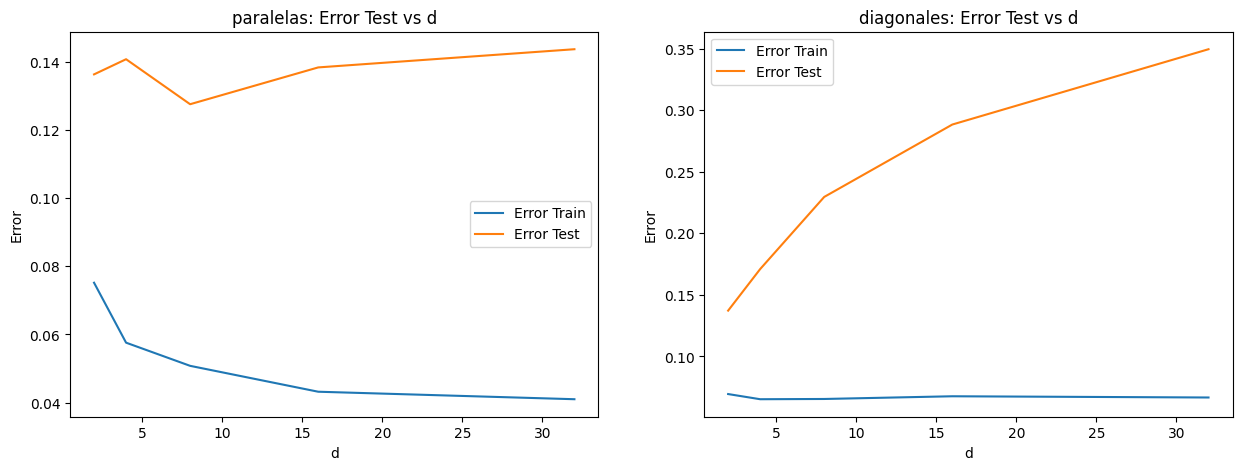

In [46]:
C = 0.78
n = 250
ds = [2**i for i in range(1,6)]

def dimensionalidad():
    j = 0
    _, axs = plt.subplots(1, 2, figsize=(15, 5))
    for gen in [paralelas, diagonales]:
        error_train = []
        error_tests = []  

        for d in ds:
            TRAIN_SETS = 20
            errortr = []
            errorts = []

            test = gen(10000, d, C)

            X_test = test['input'].tolist()
            Y_test = test['output'].tolist()

            for i in range(TRAIN_SETS):
                e = gen(n, d, C)
                X_train = e['input'].tolist()
                Y_train = e['output'].tolist()

                clf.fit(X_train, Y_train)

                scr = clf.score(X_train, Y_train)

                errortr.append(1-scr)
                errorts.append(1-clf.score(X_test, Y_test))

            error_train.append(np.mean(errortr))
            error_tests.append(np.mean(errorts))

        axs[j].plot(ds, error_train, label='Error Train')
        axs[j].plot(ds, error_tests, label='Error Test')
        axs[j].legend()
        axs[j].set_title(gen.__name__ + ': ' + 'Error Test vs d')
        axs[j].set_xlabel('d')
        axs[j].set_ylabel('Error')

        j += 1
    plt.show()

dimensionalidad()


En base a los resultado obtenidos se pude observar que en el caso de las diagonales el error del test aumenta conforme aumenta el d, mientras que en las paralelas este aumento no es tan brusco. Ademas, que el error del train en las paralelas disminuye y en las diagonales se mantiene prácticamente igual.

Eso se puede deber a que a pesar de que ambas se calculan a partir de una distribución normal, los centros son distintos. (???)

# Ejercicio 5

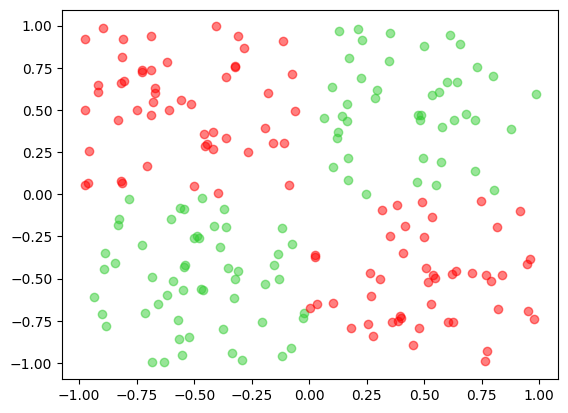

Train score:  0.5838926174496645
Test score:  0.48


[Text(0.4, 0.8333333333333334, 'x[0] <= -0.909\nentropy = 1.0\nsamples = 149\nvalue = [74.0, 75.0]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 0.81\nentropy = 0.999\nsamples = 143\nvalue = [74, 69]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.994\nsamples = 134\nvalue = [73, 61]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.503\nsamples = 9\nvalue = [1, 8]')]

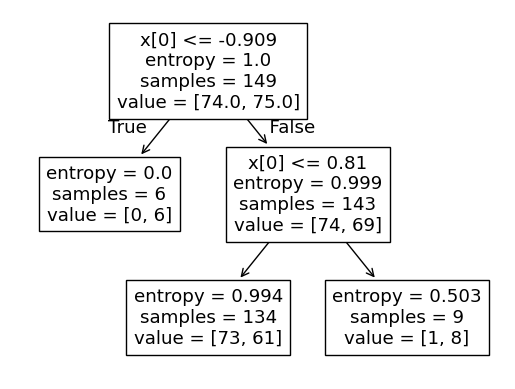

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# cargo el archivo xor.csv
# El archivo tiene dos columnas con floats y una columna con 0s y 1s
df = pd.read_csv('xor.csv')

# Accedo a la tercera columna
X = df.iloc[:, :2]
Y = df.iloc[:, 2].values

# Obtengo la primera columna como un array de numeros
A = X.iloc[:, 0].values
B = X.iloc[:, 1].values

puntos = list(zip(A, B, Y))

X1 = [x for x,_,c in puntos if c == 0]
X2 = [x for x,_,c in puntos if c == 1]
Y1 = [y for _,y,c in puntos if c == 0]
Y2 = [y for _,y,c in puntos if c == 1]

plt.scatter(X1, Y1, color='limegreen', alpha=0.5)
plt.scatter(X2, Y2, color='red', alpha=0.5)

plt.show()

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

coords = [[x,y] for x,y,_ in puntos]
clases = [c for _,_,c in puntos]

X_train, X_test, Y_train, Y_test = train_test_split(coords, clases, random_state=0)

clf.fit(X_train, Y_train)

tree.plot_tree(clf)


Al usar:
DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

Lo que se obtiene un árbol donde
Train score:  0.5838926174496645
Test score:  0.48

Este bajo score de puede deber a que al momento de crear el árbol se esta usando una "impureza minimal" del 0.03 haciendo que se restringan las cantidad de divisiones que puede realizarse por nodo. 

Lo que haría que haya overfittng